# 1- Import libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 

import tensorflow as tf 
import keras 

from sklearn.metrics import confusion_matrix , classification_report

# 2- reading the dataset 

In [2]:
data = pd.read_csv("/kaggle/input/airline-delay-cause-csv/Airline_Delay_Cause.csv")

# 3- Exploratory Data Analysis (EDA)

In [3]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [4]:
data.shape

(318017, 21)

In [5]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,318017.000000,318017.000000,317524.000000,317285.000000,317525.000000,317523.000000,317529.000000,317529.000000,317529.000000,317529.000000,317527.000000,317523.000000,317525.000000,317529.000000,317529.000000,317527.000000,317529.000000
mean,2012.450957,6.497844,381.766670,72.905076,21.073149,2.616407,24.005228,0.179037,24.975734,7.207257,0.867674,4209.989113,1286.577224,220.567542,1099.516422,7.214845,1596.062993
std,5.678296,3.459423,1027.156722,198.936754,47.671580,9.968640,85.113757,0.844834,75.275223,37.216301,3.915772,12519.021012,3515.417309,861.521440,4636.475908,38.854685,4924.950687
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.000000,0.000000,1.680000,0.000000,1.640000,0.000000,0.000000,436.000000,148.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.190000,0.580000,5.490000,0.000000,5.860000,1.000000,0.000000,1201.000000,437.000000,25.000000,203.000000,0.000000,351.000000
75%,2018.000000,10.000000,273.000000,56.000000,19.690000,2.000000,15.350000,0.000000,17.040000,4.000000,1.000000,3080.000000,1100.000000,159.000000,602.000000,0.000000,1110.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [7]:
data.isnull().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [8]:
data.duplicated().sum()

0

# 4- Data Preprocessing 

In [9]:
data.shape

(318017, 21)

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [12]:
def value(x) :
    if x <= 30:
        return 0 
    elif x <= 100 :
        return 1
    elif x <= 200 :
        return 2 
    else:
        return 3

In [13]:
data["WDCase"] = data["weather_delay"].apply(lambda x : value(x))

In [14]:
data["WDCase"].value_counts()

WDCase
0    164984
3     68251
1     50127
2     33899
Name: count, dtype: int64

# 5- Data Visualization 

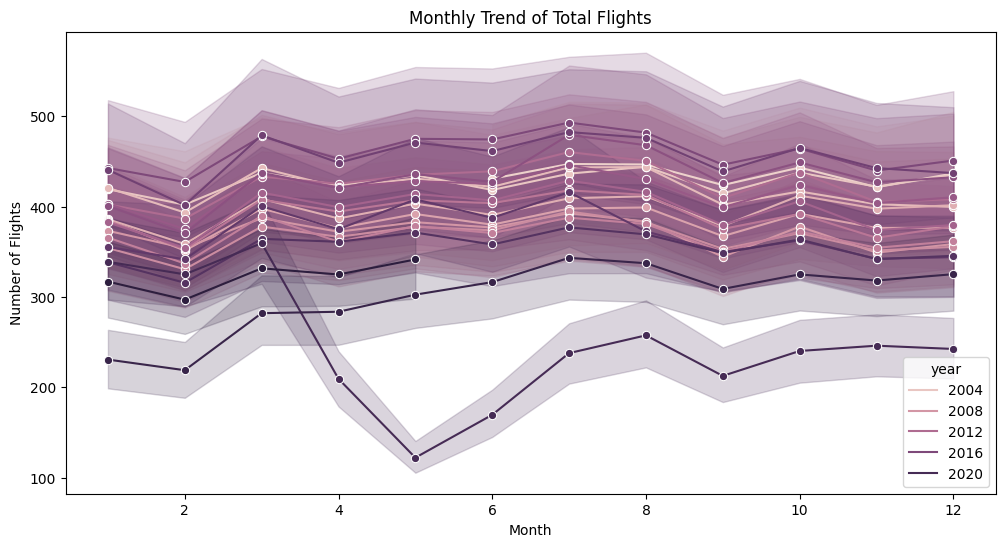

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='arr_flights', data=data, hue='year', marker='o')
plt.title("Monthly Trend of Total Flights")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.show()

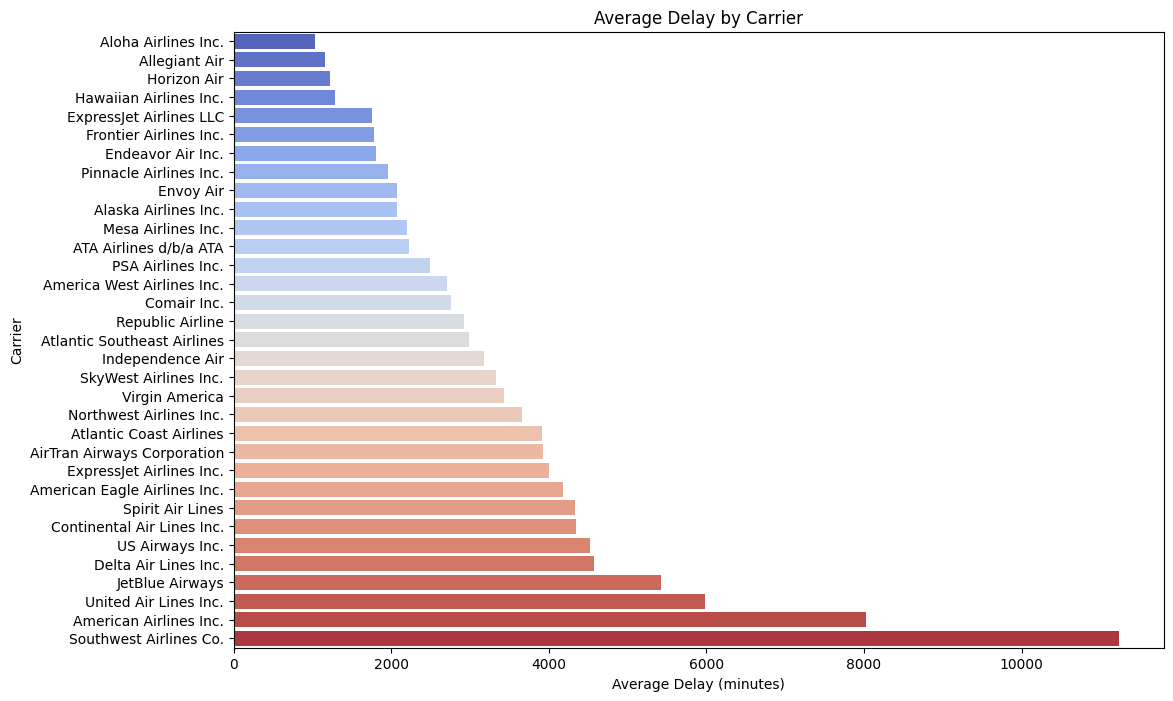

In [16]:
carrier_avg_delay = data.groupby('carrier_name')['arr_delay'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=carrier_avg_delay, y=carrier_avg_delay.index, palette="coolwarm")
plt.title("Average Delay by Carrier")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Carrier")
plt.show()

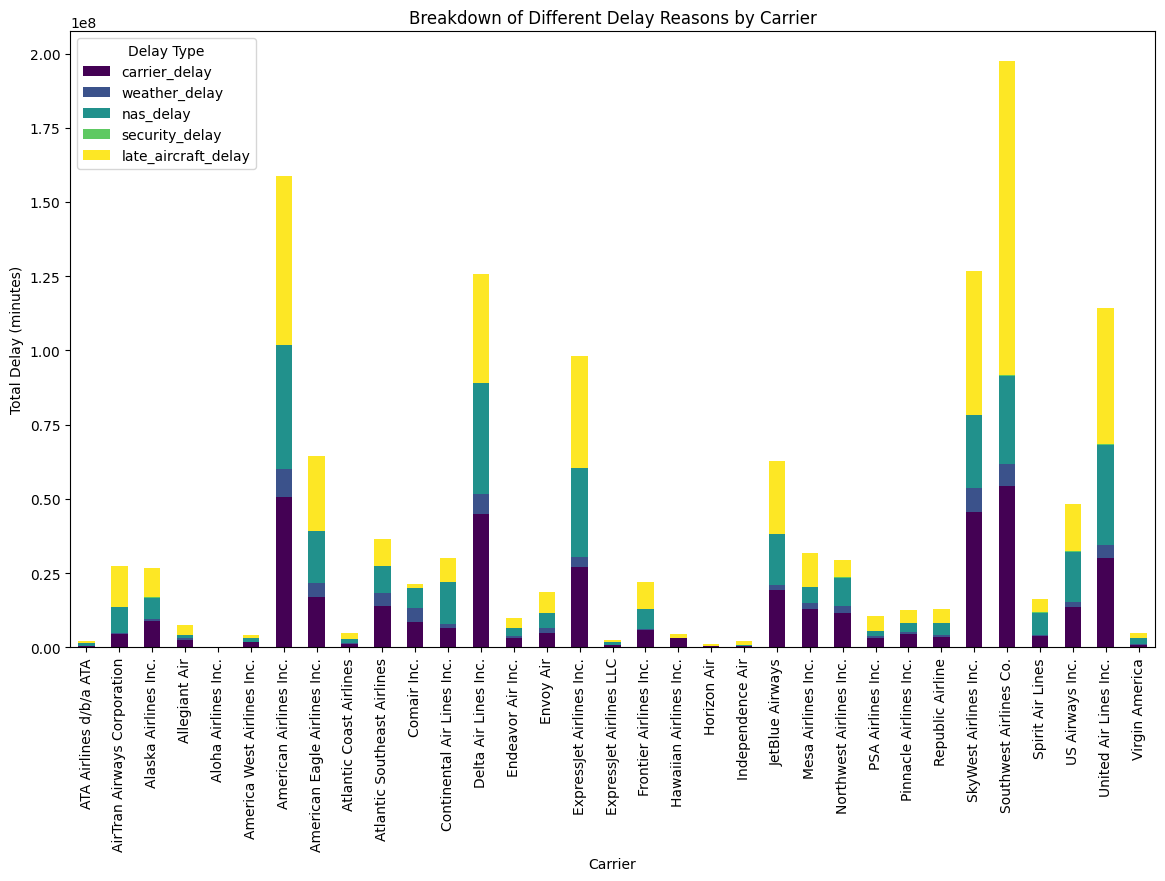

In [17]:
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_delay = data.groupby('carrier_name')[delay_types].sum()
df_delay.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="viridis")
plt.title("Breakdown of Different Delay Reasons by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Total Delay (minutes)")
plt.legend(title="Delay Type")
plt.show()

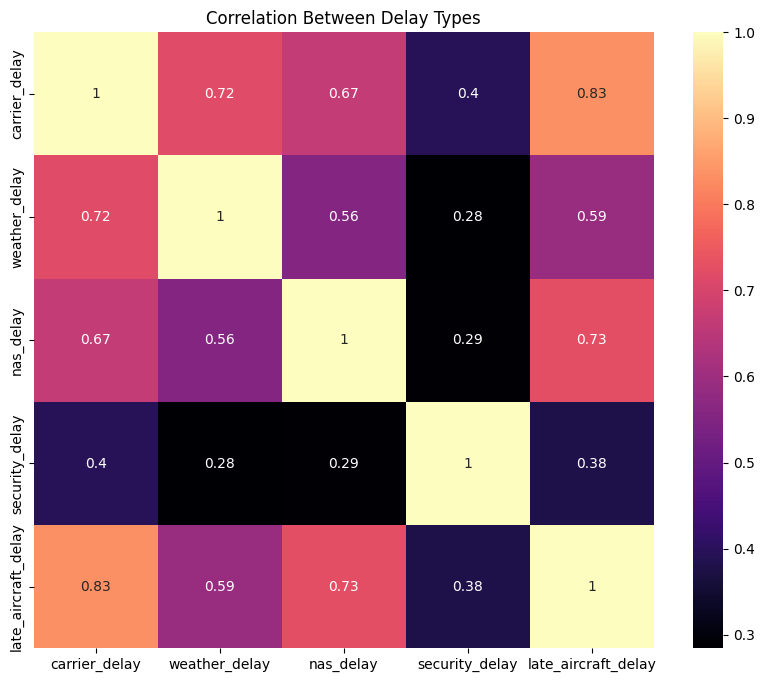

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[delay_types].corr(), annot=True, cmap='magma')
plt.title("Correlation Between Delay Types")
plt.show()

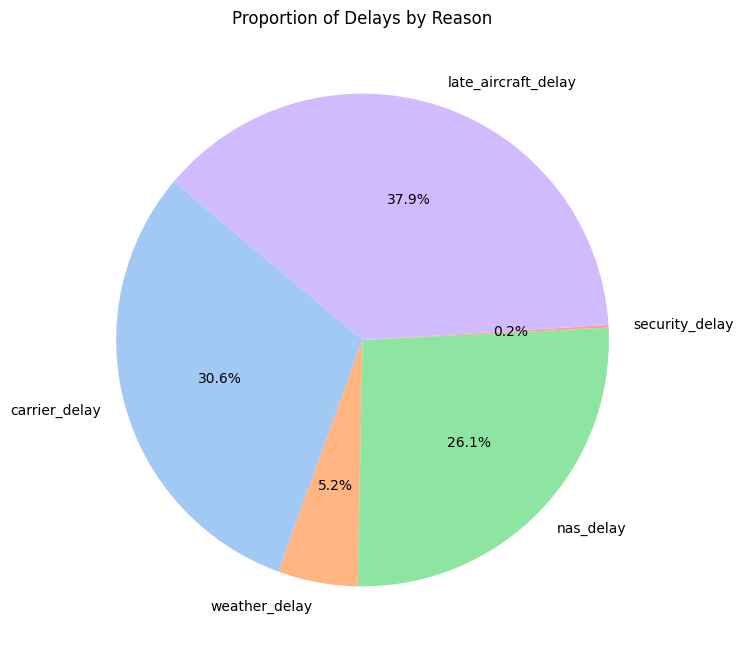

In [19]:
delay_sums = data[delay_types].sum()
plt.figure(figsize=(8, 8))
plt.pie(delay_sums, labels=delay_sums.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Delays by Reason")
plt.show()


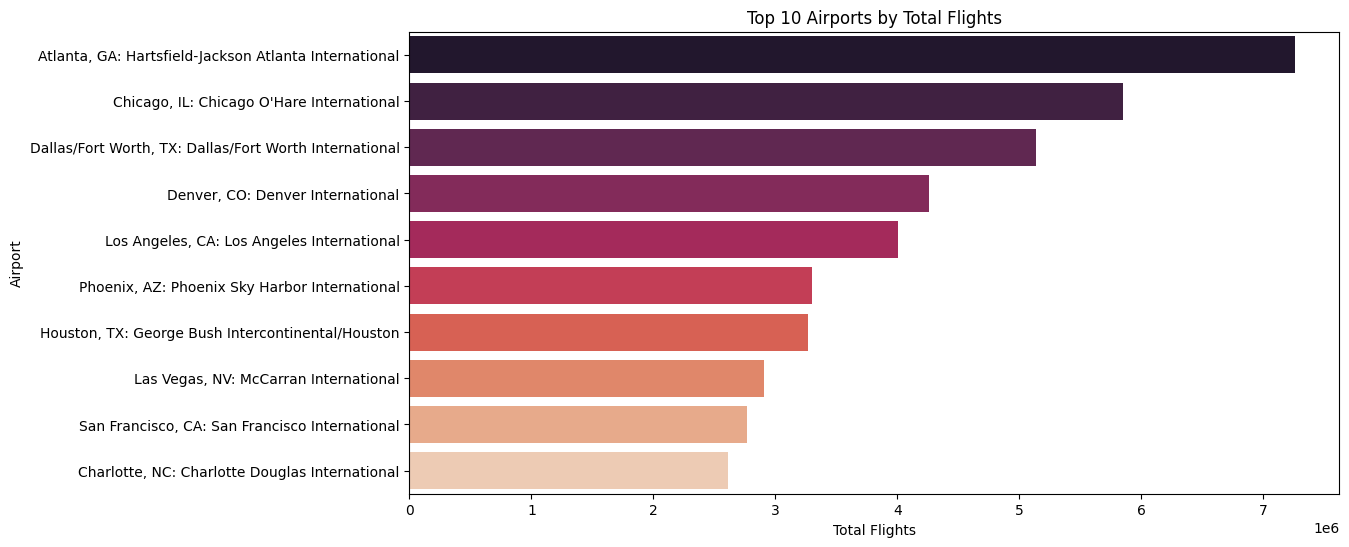

In [20]:
top_airports = data.groupby('airport_name')['arr_flights'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_airports.values, y=top_airports.index, palette="rocket")
plt.title("Top 10 Airports by Total Flights")
plt.xlabel("Total Flights")
plt.ylabel("Airport")
plt.show()

# 6- Spliting the data 

In [21]:
data = data.drop(["carrier" , "carrier_name" , "airport" , "airport_name"] , axis = 1)

In [22]:
X = data.drop(["WDCase"] , axis =1)
y = data["WDCase"]

In [23]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [24]:
y

0         0
1         0
2         0
3         1
4         0
         ..
318012    2
318013    2
318014    0
318015    0
318016    3
Name: WDCase, Length: 317261, dtype: int64

In [25]:
y_cat = tf.keras.utils.to_categorical(y)

In [26]:
y_cat

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X ,y_cat , test_size = 0.2 , random_state = 42, shuffle =True)

In [28]:
y_cat[:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [29]:
y[:5]

0    0
1    0
2    0
3    1
4    0
Name: WDCase, dtype: int64

In [30]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (253808, 17)
X_test shape is  (63453, 17)
y_train shape is  (253808, 4)
y_test shape is  (63453, 4)


# 7- Building the model 

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(10 , activation = 'tanh'),
    keras.layers.Dense(120 , activation= 'tanh'),
    keras.layers.Dense(64 , activation= 'tanh'),
    keras.layers.Dense(4 , activation= 'softmax')
])

In [32]:
model.compile(
    optimizer = 'adam' ,
    loss = 'categorical_crossentropy' ,
    metrics = ['accuracy']
)

# 8- Training the model

In [33]:
history = model.fit(X_train ,
                    y_train,
                    validation_data= (X_test , y_test),
                    epochs = 120 ,
                    batch_size = 10000 , 
                    verbose = 1 ,
                    callbacks = [ tf.keras.callbacks.EarlyStopping(
                    patience = 15 , 
                    monitor = 'val_accuracy',
                    restore_best_weights = True
                    )])

Epoch 1/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4378 - loss: 1.2256 - val_accuracy: 0.6267 - val_loss: 1.0215
Epoch 2/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6263 - loss: 1.0174 - val_accuracy: 0.6272 - val_loss: 1.0053
Epoch 3/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6268 - loss: 1.0024 - val_accuracy: 0.6287 - val_loss: 0.9938
Epoch 4/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6271 - loss: 0.9905 - val_accuracy: 0.6293 - val_loss: 0.9829
Epoch 5/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6306 - loss: 0.9789 - val_accuracy: 0.6317 - val_loss: 0.9725
Epoch 6/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6310 - loss: 0.9710 - val_accuracy: 0.6329 - val_loss: 0.9622
Epoch 7/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6322 - loss: 0.9571 - val_accuracy: 0.6334 - val_loss: 0.9486
Epoch 8/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6346 - loss: 0.9416 - val_accuracy: 0.

# 9- Model Summary 

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,514 (111.39 KB)

 Trainable params: 9,504 (37.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,010 (74.26 KB)

# 10- Save the model

In [35]:
model.save("DNN_Multi_Classification.keras")

# 11- Load the model  

In [36]:
model = keras.models.load_model('DNN_Multi_Classification.keras')

# 12- Make Predictions

In [37]:
y_prd = model.predict(X_test)

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [38]:
y_prd

array([[2.2260027e-08, 8.2056786e-06, 2.5550635e-03, 9.9743664e-01],
       [3.6022859e-03, 9.8744446e-01, 8.9452500e-03, 8.0366708e-06],
       [6.1360933e-04, 9.9811381e-01, 1.2715007e-03, 1.1106202e-06],
       ...,
       [8.8203973e-07, 1.6369290e-03, 9.9259639e-01, 5.7657668e-03],
       [9.9679154e-01, 3.2045739e-03, 3.9355195e-06, 5.0662383e-08],
       [2.2260030e-08, 8.2056795e-06, 2.5550635e-03, 9.9743670e-01]],
      dtype=float32)

# 13- Evaluating the model 

In [39]:
model_loss , model_accuracy = model.evaluate(X_test , y_test)
print('Model Loss is {}'.format(model_loss))
print('Model Accuracy is {}'.format(model_accuracy ))

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9972 - loss: 0.0158
Model Loss is 0.01647218130528927
Model Accuracy is 0.9970214366912842


# 14- Plotting the accuracies

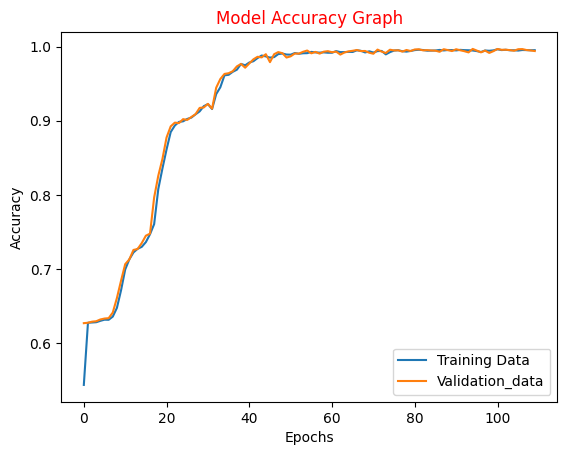

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy Graph" , color='red')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')

plt.legend(["Training Data" , 'Validation_data'])

plt.show()


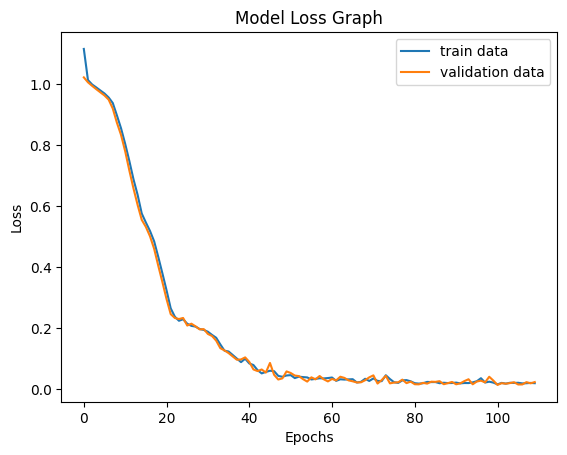

In [41]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss Graph")
plt.xlabel("Epochs")
plt.ylabel('Loss')

plt.legend(["train data","validation data"])

plt.show()